In [210]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import pickle
import math


def perf_comparitive_loss_plot(plot_num, columns, axes, x_list, y_list, legend_label_list, x_label, y_label, title):
    i = plot_num // columns
    j = plot_num % columns
    for x, y, legend_label in zip(x_list, y_list, legend_label_list):
        axes[i, j].plot(x, y, label=legend_label)
    axes[i, j].set_xlabel(x_label)
    axes[i, j].set_ylabel(y_label)
    axes[i, j].set_title(title)
    axes[i, j].grid(alpha=0.2)


In [211]:
def create_training_comparison_plots(comparative_loss_titles, comparative_loss_paths, model_save_name, plot_or_save):

    # Initialize a dictionary to store performance stats
    performance_stats = {
        'history_da': [],
        'epoch_avg_loss_mse': [],
        'epoch_avg_loss_snr': [],
        'epoch_avg_loss_psnr': [],
        'epoch_avg_loss_ssim': [],
        'epoch_avg_loss_nmi': [],
        'epoch_avg_loss_cc': [],
        'epoch_avg_loss_true_positive_xy': [],
        'epoch_avg_loss_true_positive_tof': [],
        'epoch_avg_loss_false_positive_xy': []
    }

    # Initialize a list to store epoch times
    comparative_epoch_times = []

    ### Load Model Data
    for loss_path in comparative_loss_paths:
        with open(loss_path + '\\Raw_Data_Output\\epoch_times_list_list.csv', 'rb') as f:
            comparative_epoch_times.append(np.loadtxt(f, delimiter=',').tolist())

        with open(loss_path + '\\Raw_Data_Output\\detailed_performance_loss_dict.pkl', 'rb') as f:
            model_data = pickle.load(f)
            # Append each performance metric value to the corresponding list
            for metric in performance_stats.keys():
                if metric != 'history_da':
                    performance_stats[metric].append(model_data[metric])

        with open(loss_path + '\\Raw_Data_Output\\history_da_dict.pkl', 'rb') as f:
            performance_stats['history_da'].append((pickle.load(f))['train_loss'])  

    comparative_detailed_performance_loss = performance_stats

    ### Plot Model Data

    # Define the number of rows and columns for the subplots grid
    num_metrics = len(comparative_detailed_performance_loss)
    num_rows = 5 # Two rows for plot1 and plot2
    num_columns = math.ceil(num_metrics / num_rows)

    # Create a new figure with subplots
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(23, 16))
    fig2, axes2 = plt.subplots(num_rows, num_columns, figsize=(23, 16))
    for plot_num, (metric_name, metric_values) in enumerate(comparative_detailed_performance_loss.items()):
    
        x_list_1 = []
        y_list_1 = []
        x_list_2 = []
        y_list_2 = []  

        for model_num in range(len(comparative_loss_paths)):

            ### Plot vs Epoch
            epoch_range = range(0, len(metric_values[model_num]))
            x_list_1.append(epoch_range)  
            y_list_1.append(metric_values[model_num])

            ### Plot vs Time
            x_list_2.append(comparative_epoch_times[model_num][1:])  # NOTE: [1:] is a FIX FOR EPOCH LISTS BEING SAVeD INCLUDING 0 time which breaks the plot by having one more value than the hsitory da train loss. INVESTIGATE THIS ERROR ROOT CAUSE
            y_list_2.append(metric_values[model_num])

        perf_comparitive_loss_plot(plot_num, num_columns, axes, x_list_1, y_list_1, comparative_loss_titles, "Epoch number", f"{metric_name}", f"{metric_name}")

        perf_comparitive_loss_plot(plot_num, num_columns, axes2, x_list_2, y_list_2, comparative_loss_titles, "Time (s)", f"{metric_name}", f"{metric_name}")
        
    # Adjust layout and spacing between subplots
    fig.tight_layout()
    fig2.tight_layout()

    # Show the combined figure with subplots
    plt.show()

    #Out_Label = graphics_dir + f'{model_save_name} - Full Live Stats.png'
    #plot_save_choice(plot_or_save, Out_Label)
    
    #Out_Label = 'Live Stats.png'
    #plot_save_choice(plot_or_save, Out_Label)

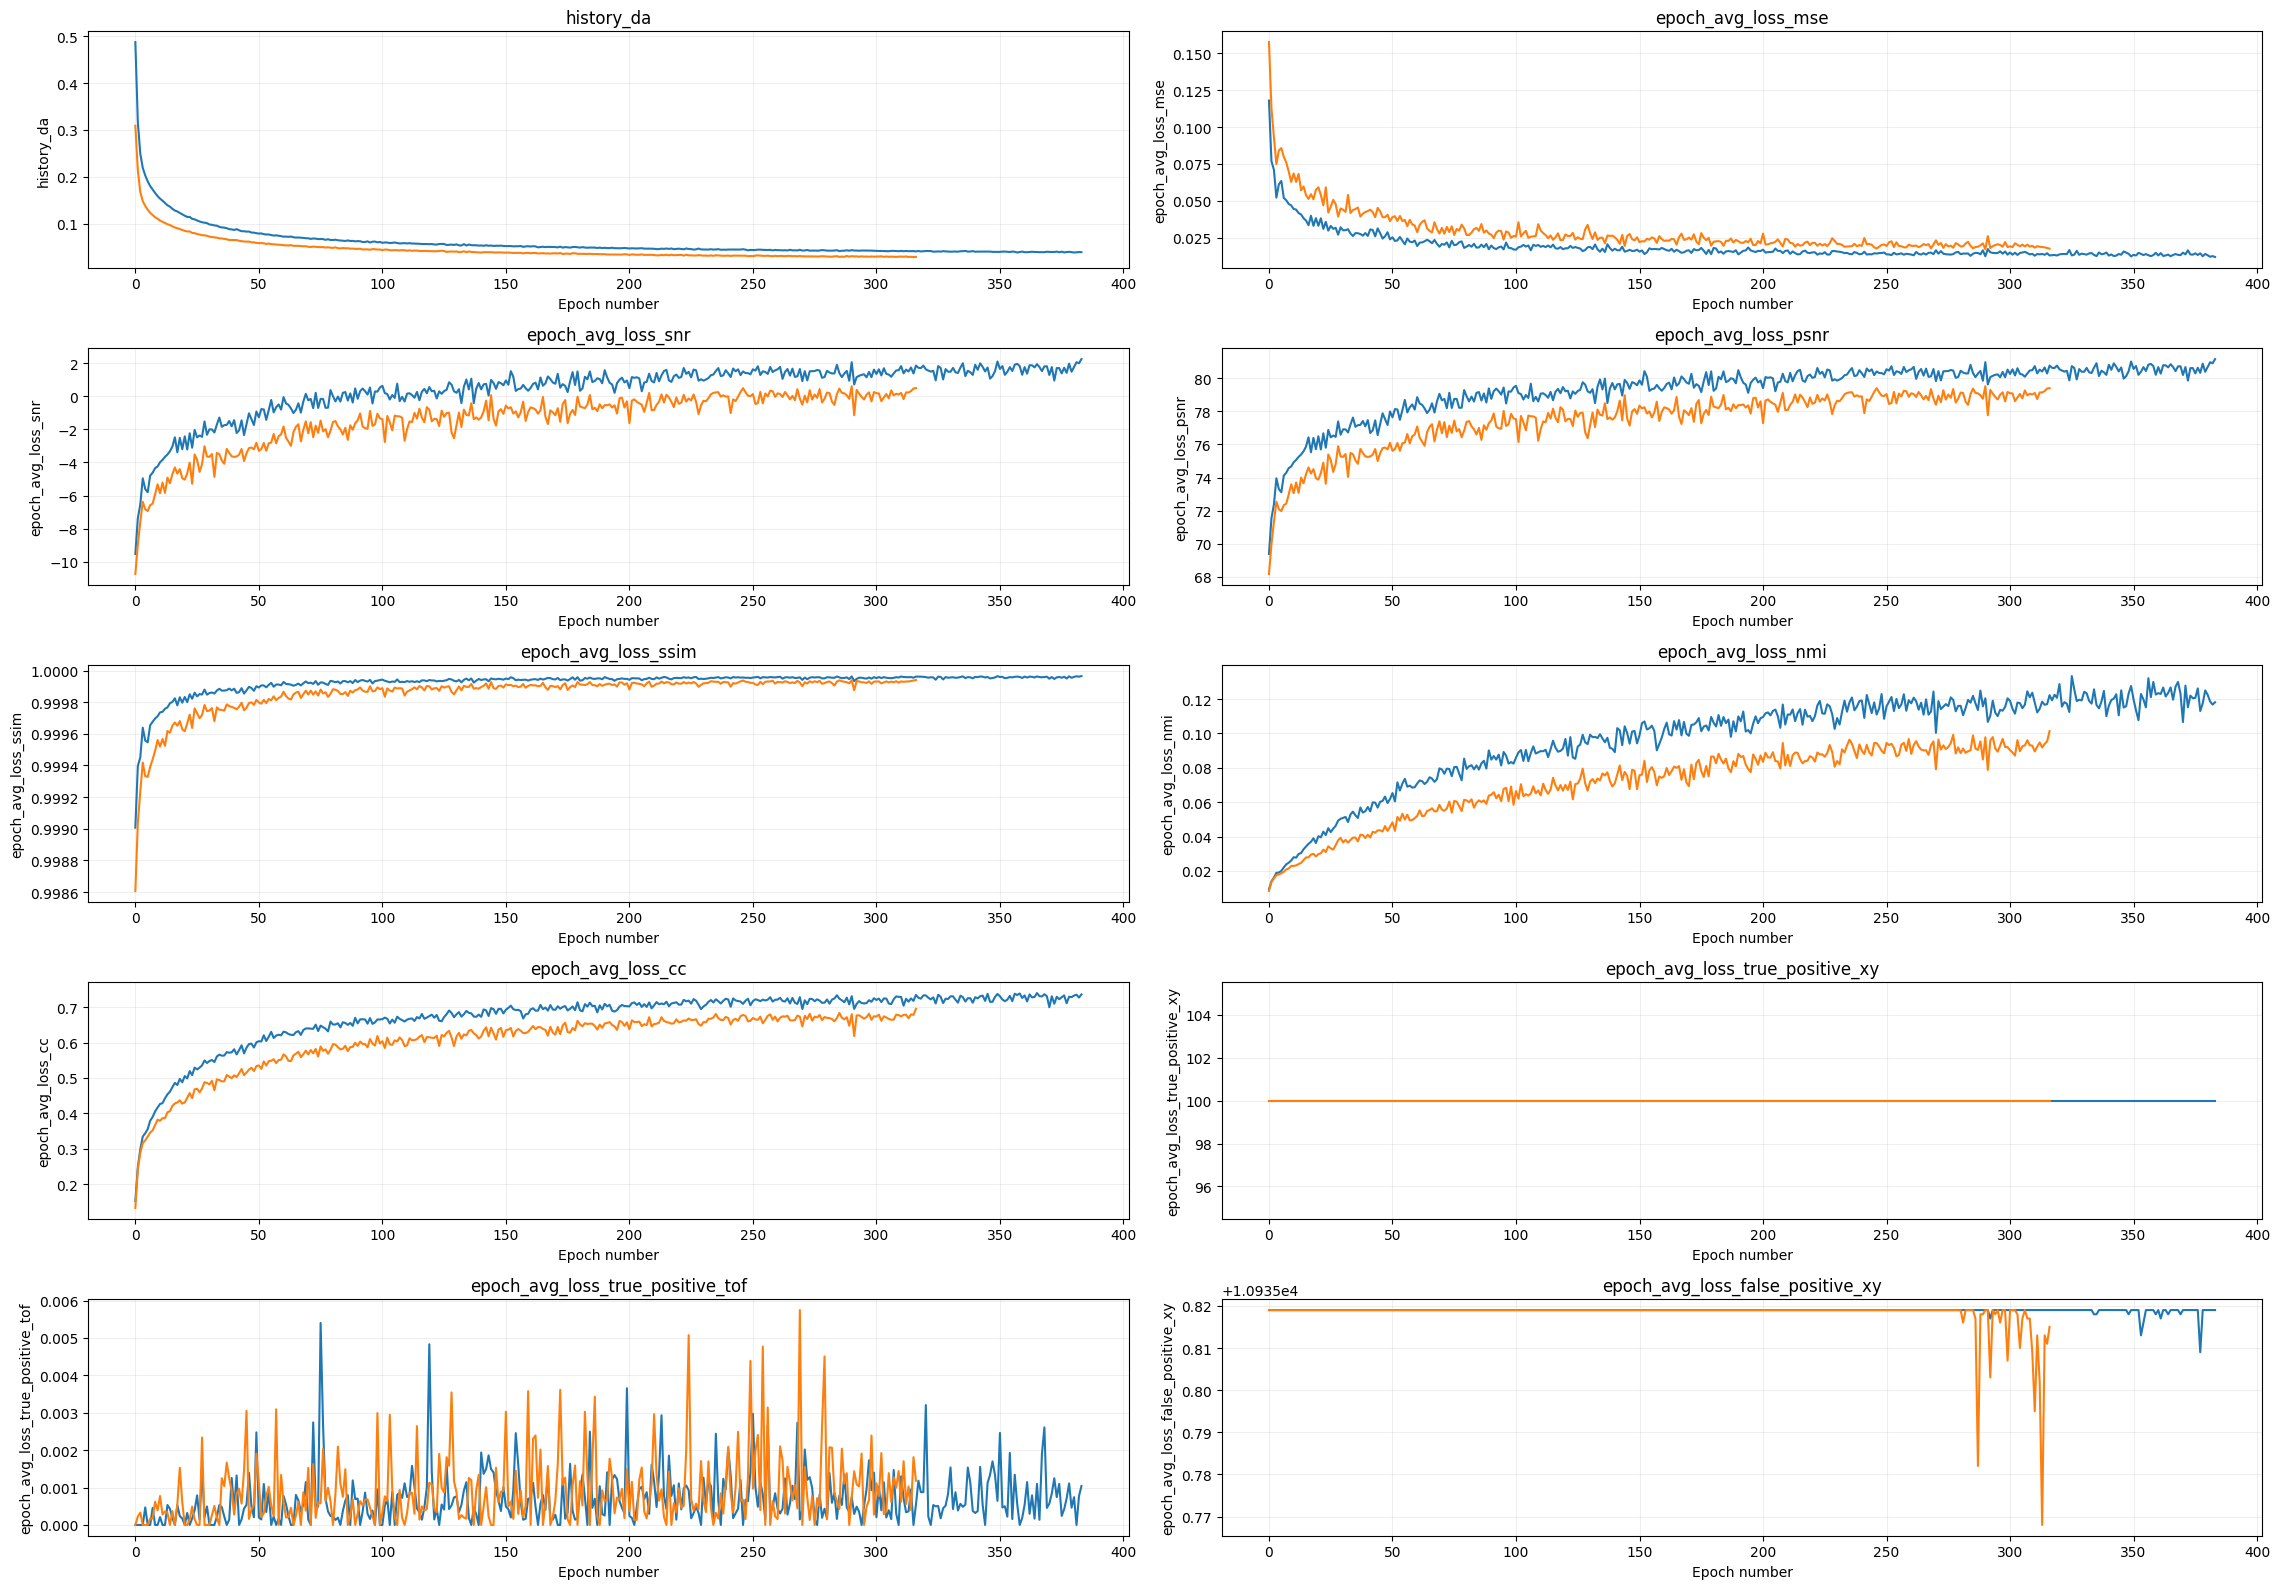

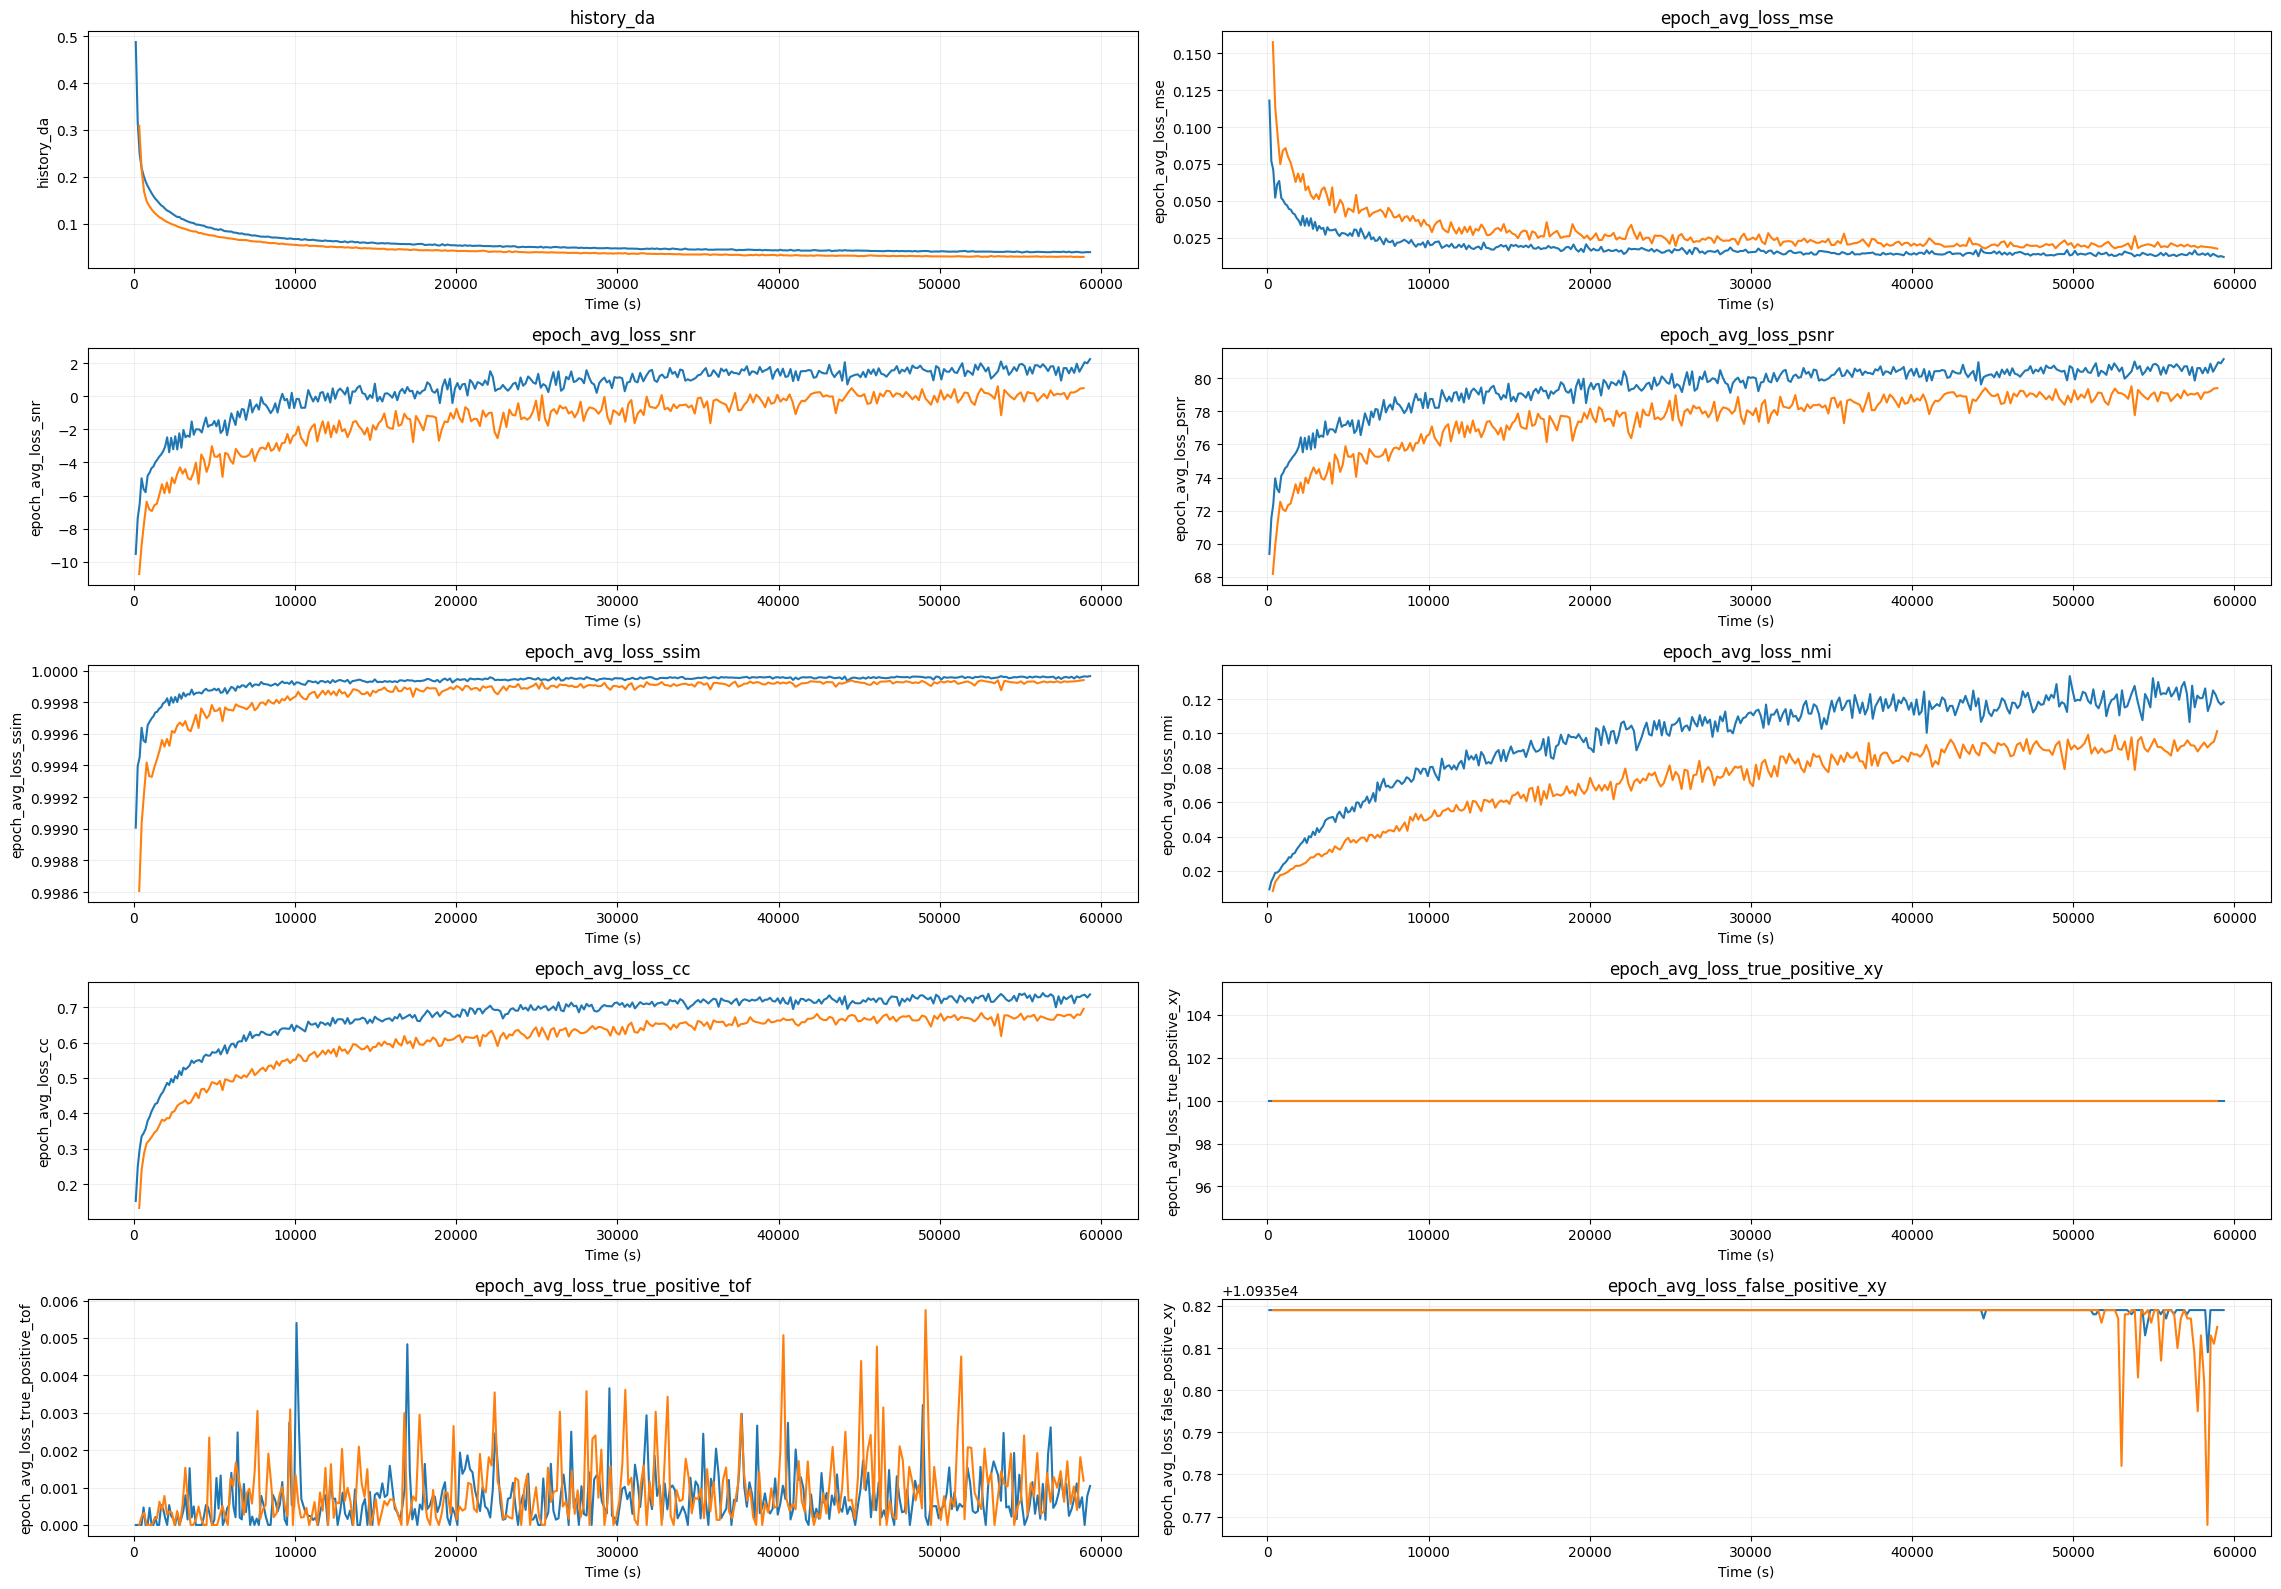

In [212]:
comparative_loss_titles = ["10K 30s 100n", "2"]
comparative_loss_paths = [r'N:\Yr 3 Project Results\S2 ffACB - Training Results\\',
                          r'N:\Yr 3 Project Results\RDT 10K S2 - Training Results\\',
                          ] 


model_save_name = ["okay"] #useless atm just showing plots
plot_or_save = "1"#useless atm just showing plots



create_training_comparison_plots(comparative_loss_titles, 
                                 comparative_loss_paths, 
                                 model_save_name, 
                                 plot_or_save)